<a href="https://colab.research.google.com/github/alfanadhya/Tugas-Pembelajaran-Mesin/blob/main/Tugas3_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import listdir
import numpy as np
from cv2 import imread, resize
from random import shuffle
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import backend as K


In [2]:
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_path = '/content/drive/Shareddrives/Tugas ML_MLP/flowers/train'
test_path = '/content/drive/Shareddrives/Tugas ML_MLP/flowers/test'

label_list = listdir(train_path)

data_train = []
label_train = []

data_test = []
label_test = []

resize_dim = (320, 240)

for label in label_list:
  for dir in listdir(train_path+'/'+label):
    data_train.append(
        resize(imread(train_path+'/'+label+'/'+dir, 0), resize_dim)
        )
    label_train.append(label_list.index(label))

for label in label_list:
  for dir in listdir(test_path+'/'+label):
    data_test.append(
        resize(imread(test_path+'/'+label+'/'+dir, 0), resize_dim)
    )
    label_test.append(label_list.index(label))

In [5]:
def shuffle_data(data, label):
  ind = list(range(len(data)))
  shuffle(ind)
  return np.array([
          data[i] for i in ind
  ]), np.array([
      label[i] for i in ind
  ])
X_train, y_train = shuffle_data(data_train, label_train)
X_test, y_test = shuffle_data(data_test, label_test)

In [6]:
def display(imgs, labels):
  fig = plt.gcf()
  fig.set_size_inches(12, 9)
  
  for i in range(12):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(3, 4, i + 1)
    sp.axis('Off')
    
    # For displaying a grayscale image, set up the colormapping 
    plt.imshow(imgs[i], cmap='gray')
    plt.title('sunflower' if labels[i]==0 else 'dandelion' if labels[i]==1 else 'daisy')

  plt.show()

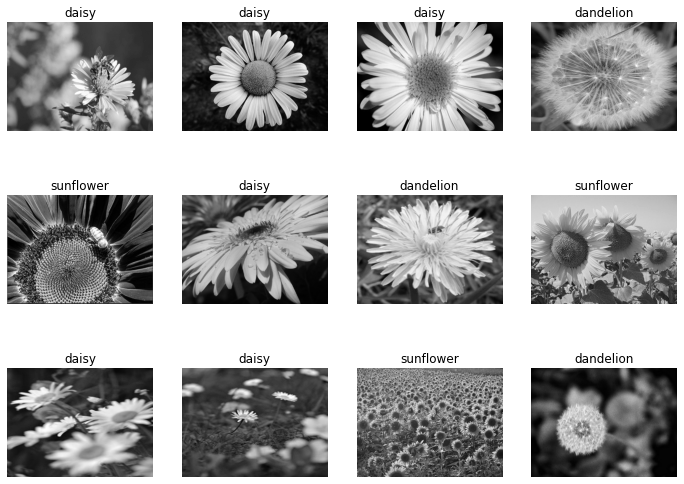

In [7]:
display(X_train, y_train)

In [8]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(240, 320, 1)),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(num_classes)
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 240, 320, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 238, 318, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 159, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 117, 157, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 78, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 76, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 38, 64)        0

## Learning Rate 0.1

In [10]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
8/8 [==============================] - 6s 271ms/step - loss: 2.1682 - accuracy: 0.3542 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/50
8/8 [==============================] - 1s 84ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/50
8/8 [==============================] - 1s 85ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/50
8/8 [==============================] - 1s 84ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/50
8/8 [==============================] - 1s 84ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/50
8/8 [==============================] - 1s 85ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/50
8/8 [==============================] - 1s 85ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 8/50
8/8 [==========

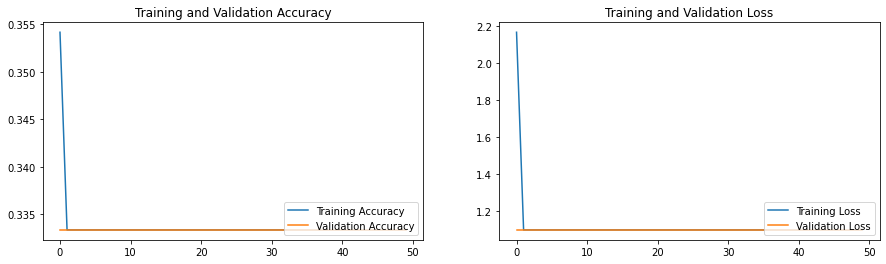

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

## Learning Rate 0.8

In [13]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.8),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
8/8 [==============================] - 1s 108ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/50
8/8 [==============================] - 1s 85ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/50
8/8 [==============================] - 1s 85ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/50
8/8 [==============================] - 1s 85ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/50
8/8 [==============================] - 1s 85ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/50
8/8 [==============================] - 1s 85ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/50
8/8 [==============================] - 1s 84ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 8/50
8/8 [==========

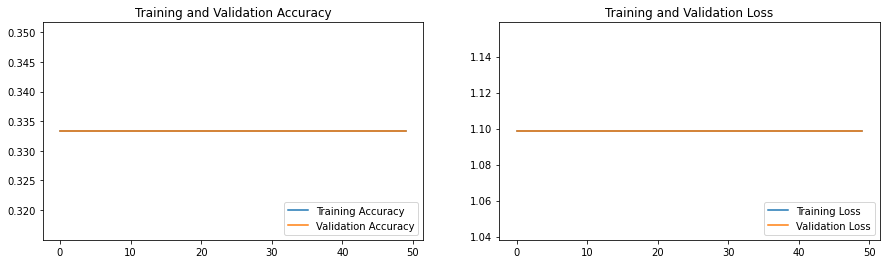

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

# With Image Augmentation

In [16]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(240, 320, 1)),
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(num_classes)
])

In [17]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
8/8 [==============================] - 2s 108ms/step - loss: 4.1472 - accuracy: 0.2875 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/50
8/8 [==============================] - 1s 87ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/50
8/8 [==============================] - 1s 88ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/50
8/8 [==============================] - 1s 87ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/50
8/8 [==============================] - 1s 88ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/50
8/8 [==============================] - 1s 88ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/50
8/8 [==============================] - 1s 88ms/step - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 8/50
8/8 [==========

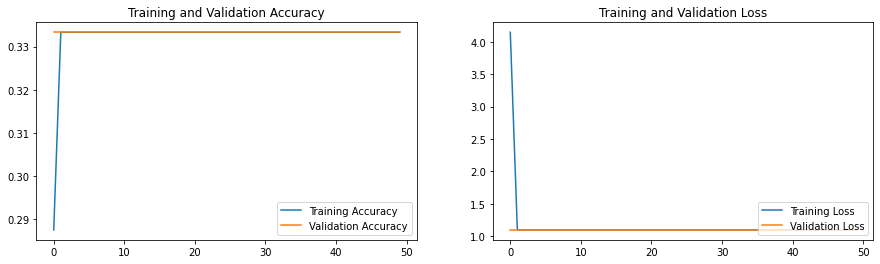

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()